# Model: Gender Only

https://www.kaggle.com/c/titanic/overview

Features included in this model are:
    
* age 
* sibsp 
* parch 
* fare


* pclass
* sex
* ticket
* embarked

The numerical features are scaled.  

# Initialization

In [1]:
%run init.ipynb

In [2]:
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression 

from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

from sklearn.preprocessing import scale

import great_expectations as ge
from progressbar import ProgressBar

RANDOM_STATE = 42

In [3]:
from data.data import (transform_X_numerical, 
                       transform_X_categorical, 
                       transform_X)

## Extract Clean Data

**Separate data into X (features) and y (label)**

In [4]:
Xy = pd.read_csv('../data/processed/train_v4.csv', index_col='passengerid', dtype={'pclass':str, 'is_child':int, 'is_traveling_alone':int})
Xy

,survived,pclass,name,sex,sibsp,parch,ticket,embarked,title,last_name,cabin_number,family_size,fare,fare_bin,age,age_bin,is_child,is_traveling_alone
passengerid,,,,,,,,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,1,0,A/5 21171,S,Mr,Braund,21171.0,2,7.2500,q1,22.0,student,0,0
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,1,0,PC 17599,C,Mrs,Cumings,17599.0,2,71.2833,q4,38.0,adult,0,0
3,1,3,"Heikkinen, Miss. Laina",female,0,0,STON/O2. 3101282,S,Miss,Heikkinen,3101282.0,1,7.9250,q1,26.0,young_adult,0,1
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,1,0,113803,S,Mrs,Futrelle,113803.0,2,53.1000,q4,35.0,young_adult,0,0
5,0,3,"Allen, Mr. William Henry",male,0,0,373450,S,Mr,Allen,373450.0,1,8.0500,q2,35.0,young_adult,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
887,0,2,"Montvila, Rev. Juozas",male,0,0,211536,S,Mr,Montvila,211536.0,1,13.0000,q2,27.0,young_adult,0,1
888,1,1,"Graham, Miss. Margaret Edith",female,0,0,112053,S,Miss,Graham,112053.0,1,30.0000,q3,19.0,student,0,1
889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,1,2,W./C. 6607,S,Miss,Johnston,6607.0,4,23.4500,q3,22.0,student,0,0


## Train Test Split Data

In [5]:
all_columns =['age', 'fare', 'family_size', 'is_child', 'is_traveling_alone',
              'sex_male', 'embarked_Q', 'embarked_S', 'title_Miss', 'title_Mr',
              'title_Mrs', 'title_Officer', 'title_Royalty', 'age_bin_baby',
              'age_bin_child', 'age_bin_senior', 'age_bin_student', 'age_bin_teen',
              'age_bin_young_adult', 'fare_bin_q2', 'fare_bin_q3', 'fare_bin_q4',
              'pclass_2', 'pclass_3'],

In [6]:
#important_features = all_columns

important_features = ['title_Mr', 'title_Mrs', 'family_size', 'is_child', 'pclass_2', 'pclass_3'] # Model 6
# important_features = ['title_Mr', 'title_Mrs',  'is_child', 'pclass_2', 'pclass_3'] # Model 6b



In [7]:
X_all = transform_X(Xy.drop(['name'], axis=1), 
                    numerical_columns=["age", "fare"],
                    categorical_columns=[
                        "sex",
                         "family_size",
                        "embarked",
                        "title",
                        "age_bin",
                        "fare_bin",
                        "is_child",
                        "is_traveling_alone",
                        "pclass"])
                        
X = X_all[important_features]
y = Xy['survived']
X.shape

X

(891, 6)

,title_Mr,title_Mrs,family_size,is_child,pclass_2,pclass_3
passengerid,,,,,,
1,1,0,2,0,0,1
2,0,1,2,0,0,0
3,0,0,1,0,0,1
4,0,1,2,0,0,0
5,1,0,1,0,0,1
...,...,...,...,...,...,...
887,1,0,1,0,1,0
888,0,0,1,0,0,0
889,0,0,4,0,0,1


### Split data into train and test. 

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=RANDOM_STATE)
y_test = y_test.to_frame()

print(f'Number of sample in training data = {len(X_train)}')
print(f'Number of sample in test data = {len(X_test)}')

Number of sample in training data = 712
Number of sample in test data = 179


### Logistic Regression with Age

In [16]:
X.columns

model = LogisticRegression(random_state=RANDOM_STATE, max_iter=500, fit_intercept=True,
                          penalty='l2', l1_ratio=1)

model.fit(X_train, y_train) 

y_pred, predicted_accuracy_score, cv_scores = pm.calc_model_rst_table_metrics(model, X_train, y_train, X_test, y_test, 
                                                      model_name='logreg_model_3b', cv=5, verbose=True)
    

Index(['title_Mr', 'title_Mrs', 'family_size', 'is_child', 'pclass_2',
       'pclass_3'],
      dtype='object')

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=1, max_iter=500,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=42, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)


Accuracy Score on X_test,y_test:  0.8268


Cross Validation Scores:
	Accuracy 	: 0.8384 (+/- 0.0352)
	Recall		: 0.7162 (+/- 0.0677)
	Precision	: 0.8306 (+/- 0.0424)
	F1		: 0.7691 (+/- 0.0571)


11/12/19, logreg_model_3b,  <kaggle_accuracy>, 0.8384, 0.7162,0.8306,0.7691


# Feature Selection

In [17]:
from yellowbrick.model_selection import FeatureImportances

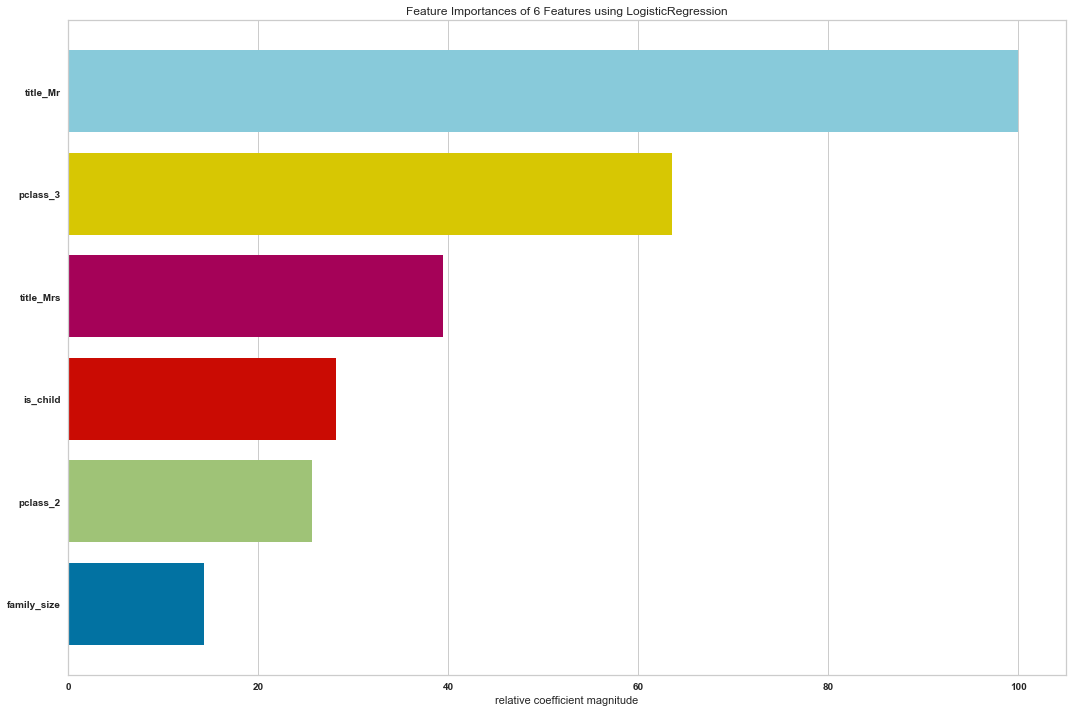

In [18]:
viz = FeatureImportances(model, stack=False, relative=True, absolute=True,  size=(1080, 720))
viz.fit(X, y);
viz.show();

In [76]:
fi = (pd.DataFrame(data = viz.feature_importances_,
             index = viz.features_,
             columns=['Feature Importance']
            )
      .sort_values(by='Feature Importance', ascending=False)
     )

fi.iloc[0:10].index.tolist()

with pd.option_context('display.max_rows', 20):
	fi.reset_index()

['title_Mr', 'pclass_3', 'title_Mrs', 'pclass_2', 'is_child']

,index,Feature Importance
0,title_Mr,100.000000
1,pclass_3,69.746316
2,title_Mrs,29.355846
3,pclass_2,24.044784
4,is_child,7.137983


# Prepare Submission

In [77]:
from models import kaggle

In [78]:
filename = 'logres_model_6b.csv'

In [79]:
X_holdout = pd.read_csv('../data/processed/holdout_v3.csv', 
                        index_col='passengerid', 
                        dtype={'pclass':str, 'is_child':int, 'is_traveling_alone':int})

X_test_kaggle_public = transform_X(X_holdout).reindex(X_test.columns, axis=1)

X_test_kaggle_public.describe()

,title_Mr,title_Mrs,is_child,pclass_2,pclass_3
count,418.000000,418.000000,418.000000,418.000000,418.000000
mean,0.574163,0.177033,0.069378,0.222488,0.521531
std,0.495062,0.382154,0.254400,0.416416,0.500135
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,0.000000,0.000000,1.000000
75%,1.000000,0.000000,0.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000


In [80]:
y_pred = (pd.Series(model.predict(X_test_kaggle_public), 
                   index=X_test_kaggle_public.index, name='Survived').to_frame().sort_index()
         )

y_pred.index.names = ['PassengerId']

y_pred.to_csv(filename)

message = (f'{filename} \n\n'
           f'This is a submission test via the Kaggle API. \n\n'
           f'{model} \n\n'
           f'{X_test_kaggle_public.columns} \n\n'
          )

print(message)

logres_model_6b.csv 

This is a submission test via the Kaggle API. 

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=1, max_iter=500,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=42, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False) 

Index(['title_Mr', 'title_Mrs', 'is_child', 'pclass_2', 'pclass_3'], dtype='object') 




In [81]:
kaggle.submit_to_kaggle_titanic_competition(filename, message);

logres_model_6b.csv
logres_model_6b.csv 

This is a submission test via the Kaggle API. 

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=1, max_iter=500,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=42, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False) 

Index(['title_Mr', 'title_Mrs', 'is_child', 'pclass_2', 'pclass_3'], dtype='object') 


b'Successfully submitted to Titanic: Machine Learning from Disaster'
b'\r  0%|          | 0.00/2.77k [00:00<?, ?B/s]\r100%|\xe2\x96\x88\xe2\x96\x88\xe2\x96\x88\xe2\x96\x88\xe2\x96\x88\xe2\x96\x88\xe2\x96\x88\xe2\x96\x88\xe2\x96\x88\xe2\x96\x88| 2.77k/2.77k [00:00<00:00, 18.5kB/s]\r100%|\xe2\x96\x88\xe2\x96\x88\xe2\x96\x88\xe2\x96\x88\xe2\x96\x88\xe2\x96\x88\xe2\x96\x88\xe2\x96\x88\xe2\x96\x88\xe2\x96\x88| 2.77k/2.77k [00:00<00:00, 3.81kB/s]\n'


In [56]:
import subprocess
from subprocess import check_output

command = ['kaggle', 'competitions', 'submissions', 'titanic']

check_output(command)

b"fileName                                date                 description                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                       status    publicScore  privateScore  \n--------------------------------------  -------------------  -------------------------------------------------------------------

In [58]:
!ls j*

ls: j*: No such file or directory


In [50]:
process = subprocess.Popen(,
                    stdout=subprocess.PIPE,
                    stderr=subprocess.PIPE)

out = check_output(["ntpq", "-p"])

In [61]:
pd.read_csv('junk.csv', sep=',')

ParserError: Error tokenizing data. C error: Expected 1 fields in line 7, saw 5


In [38]:
from io import StringIO

In [51]:
tmp=print(process.stdout.read())

b"fileName                                date                 description                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                       status    publicScore  privateScore  \n--------------------------------------  -------------------  -------------------------------------------------------------------

In [52]:
tmp

In [53]:
io_string = StringIO(tmp)

In [54]:
io_string

In [55]:
pd.read_csv(io_string)

EmptyDataError: No columns to parse from file